In [10]:
!pip install fasttext-wheel

In [11]:
dir(model)

NameError: name 'model' is not defined

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/moksh/OneDrive/Documents/OneDrive/Desktop/LCIT/NLP_models/Sentiment_Data/Sentiment_Data.csv", 
                 encoding='ISO-8859-1') 
df.head()

,Tweet,Sentiment
0,@_angelica_toy Happy Anniversary!!!....The Day...,Mild_Pos
1,@McfarlaneGlenda Happy Anniversary!!!....The D...,Mild_Pos
2,@thevivafrei @JustinTrudeau Happy Anniversary!...,Mild_Pos
3,@NChartierET Happy Anniversary!!!....The Day t...,Mild_Pos
4,@tabithapeters05 Happy Anniversary!!!....The D...,Mild_Pos


In [ ]:
df['Sentiment'].unique()

array(['Mild_Pos', 'Strong_Pos', 'Neutral', 'Strong_Neg', 'Mild_Neg'],
      dtype=object)

In [ ]:
!pip install spacy  emoji

  Using cached spacy-3.8.7-cp311-cp311-win_amd64.whl.metadata (28 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.13-cp311-cp311-win_amd64.whl.metadata (2.2 kB)
  Using cached cymem-2.0.11-cp311-cp311-win_amd64.whl.metadata (8.8 kB)
  Using cached preshed-3.0.10-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached thinc-8.3.6-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.5.1-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.16.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic-2.11.7-py3-none-any.whl.metadata (67 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-no

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import re
import pandas as pd
import spacy
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Initialize stopwords set and Stemmer
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Define a dictionary of common slangs and abbreviations
slang_dict = {
    "u": "you",
    "r": "are",
    "pls": "please",
    "omg": "oh my god",
    "btw": "by the way",
    "idk": "i don't know",
    "lmao": "laughing my ass off",
    "brb": "be right back",
    "lol": "laugh out loud",
    "smh": "shaking my head",
    "tbh": "to be honest",
    "bff": "best friends forever",
    "ttyl": "talk to you later"
}

In [ ]:
# Spell correction function
def spell_correct(word):
    return word

In [ ]:
import re
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import spacy
import emoji
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import defaultdict
import unicodedata

# Full preprocessing function
def clean_text(text):
    if pd.isnull(text): 
        return ""
    text = text.lower()

    # Normalize unicode junk early
    text = unicodedata.normalize("NFKD", text)
    text = text.encode("ascii", "ignore").decode("utf-8", "ignore")

    # Step 1: Remove unwanted symbols
    text = re.sub(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b', '<IP>', text)
    text = re.sub(r'http\\S+|www\\.\\S+', '<URL>', text)
    text = re.sub(r'\S+@\S+', '<EMAIL>', text)
    text = re.sub(r'@\w+', '<USER>', text)
    text = re.sub(r'<.*?>', '', text)
    text = emoji.replace_emoji(text, replace=' <EMOJI> ')

    # Step 2: Tokenize and expand slang
    tokens = word_tokenize(text)
    tokens = [slang_dict.get(tok, tok) for tok in tokens]

    # Step 3–4: Spell correction
    tokens = [spell_correct(tok) for tok in tokens]
    doc = nlp(" ".join(tokens))

    # Step 5–7: Keep allowed POS and lemmatize
    allowed_postags = {"NOUN", "VERB", "ADJ", "PROPN"}
    named_entities = {ent.text for ent in doc.ents}
    final_tokens = []
    for token in doc:
        if token.text in named_entities or token.pos_ in allowed_postags:
            if token.text not in stop_words and token.is_alpha:
                final_tokens.append(token.lemma_.lower())

    return " ".join(final_tokens)

In [ ]:
df.shape

(451280, 2)

In [ ]:
# Drop rows where both Tweet and Sentiment are missing
df = df[~(df['Tweet'].isna() & df['Sentiment'].isna())]
df = df.drop_duplicates(subset=['Tweet'])

df.shape

(451280, 2)

In [ ]:
# Preprocess tweets
df['clean_text'] = df['Tweet'].apply(clean_text)


In [ ]:
#df.to_csv("cleaned_twitter_data.csv", index=False, encoding='utf-8')
df['clean_text'].head()

0    happy anniversary day freedumb die tune mclean...
1    happy anniversary day freedumb die tune mclean...
2    happy anniversary day freedumb die tune mclean...
3    happy anniversary day freedumb die tune mclean...
4    happy anniversary day freedumb die tune mclean...
Name: clean_text, dtype: object

In [ ]:
import pandas as pd

df.to_csv("Sentiment_Data_with_clean_text.csv", index=False, encoding='utf-8')


In [ ]:

df = pd.read_csv("Sentiment_Data_with_clean_text.csv", encoding='utf-8')
print(df.columns)

Index(['Tweet', 'Sentiment', 'clean_text'], dtype='object')


In [ ]:
df['Sentiment'].unique()

array(['Mild_Pos', 'Strong_Pos', 'Neutral', 'Strong_Neg', 'Mild_Neg'],
      dtype=object)

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import re, emoji, unicodedata
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, accuracy_score
from tqdm import tqdm
import matplotlib.pyplot as plt

Relabelling

In [ ]:
# Relabel for 3-class task
def simplify_sentiment(sent):
    if 'Pos' in sent: return 'Positive'
    elif 'Neg' in sent: return 'Negative'
    else: return 'Neutral'

df['Sentiment3'] = df['Sentiment'].apply(simplify_sentiment)
df.dropna(subset=['clean_text'], inplace=True)

In [ ]:
df.head()


,Tweet,Sentiment,clean_text,Sentiment3
0,@_angelica_toy Happy Anniversary!!!....The Day...,Mild_Pos,happy anniversary day freedumb die tune mclean...,Positive
1,@McfarlaneGlenda Happy Anniversary!!!....The D...,Mild_Pos,happy anniversary day freedumb die tune mclean...,Positive
2,@thevivafrei @JustinTrudeau Happy Anniversary!...,Mild_Pos,happy anniversary day freedumb die tune mclean...,Positive
3,@NChartierET Happy Anniversary!!!....The Day t...,Mild_Pos,happy anniversary day freedumb die tune mclean...,Positive
4,@tabithapeters05 Happy Anniversary!!!....The D...,Mild_Pos,happy anniversary day freedumb die tune mclean...,Positive


Train-Test Split

In [128]:
# Split: train (64%), val (16%), test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    df['clean_text'], df['Sentiment3'], test_size=0.2, stratify=df['Sentiment3'], random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42)

Word Embedding & Tokenization

In [ ]:
import fasttext
ft_model = fasttext.load_model("C:/Users/moksh/OneDrive/Documents/OneDrive/Desktop/LCIT/NLP_models/cc.en.300.bin/cc.en.300.bin")

embedding_dim = 300
vocab = set(word for sentence in X_train for word in sentence.split())
word2idx = {word: idx+2 for idx, word in enumerate(vocab)}
word2idx["<PAD>"] = 0
word2idx["<UNK>"] = 1
idx2word = {idx: word for word, idx in word2idx.items()}

def create_embedding_matrix():
    matrix = np.random.normal(size=(len(word2idx), embedding_dim))
    matrix[word2idx["<PAD>"]] = np.zeros(embedding_dim)
    for word, i in word2idx.items():
        if word in ft_model:
            matrix[i] = ft_model[word]
    return torch.tensor(matrix, dtype=torch.float)

embedding_matrix = create_embedding_matrix()

In [17]:
embedding_matrix.shape
# embedding_matrix[:5]  # Display first 5 rows of the embedding matrix

torch.Size([124909, 300])

In [13]:
np.save("embedding_matrix_300d.npy", embedding_matrix.numpy())

import pickle

with open("word2idx.pkl", "wb") as f:
    pickle.dump(word2idx, f)

In [14]:
embedding_matrix = torch.tensor(np.load("embedding_matrix_300d.npy"), dtype=torch.float)

In [15]:
with open("word2idx.pkl", "rb") as f:
    word2idx = pickle.load(f)

Text Encoding

In [103]:
from sklearn.preprocessing import LabelEncoder
MAX_LEN = 20

def encode_sentence(sentence):
    tokens = sentence.split()
    ids = [word2idx.get(token, word2idx["<UNK>"]) for token in tokens[:MAX_LEN]]
    return ids + [word2idx["<PAD>"]] * (MAX_LEN - len(ids))

X_train_ids = torch.tensor([encode_sentence(sent) for sent in X_train])
X_val_ids = torch.tensor([encode_sentence(sent) for sent in X_val])
X_test_ids = torch.tensor([encode_sentence(sent) for sent in X_test])

label_enc = LabelEncoder()
y_train_ids = torch.tensor(label_enc.fit_transform(y_train), dtype=torch.long)
y_val_ids = torch.tensor(label_enc.transform(y_val), dtype=torch.long)
y_test_ids = torch.tensor(label_enc.transform(y_test), dtype=torch.long)


DataLoaders

In [104]:
from torch.utils.data import DataLoader, TensorDataset
# Create DataLoaders

batch_size = 32

train_loader = DataLoader(TensorDataset(X_train_ids, y_train_ids), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_ids, y_val_ids), batch_size=batch_size)
test_loader = DataLoader(TensorDataset(X_test_ids, y_test_ids), batch_size=batch_size)


Embedding layer using pretrained fasttext

In [105]:
class EmbeddingLayer(nn.Module):
    def __init__(self, embedding_matrix, freeze=True):
        super().__init__()
        vocab_size, embedding_dim = embedding_matrix.shape
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix, freeze=freeze, padding_idx=word2idx["<PAD>"])

    def forward(self, x):
        return self.embedding(x)

Relative Positional Encoding

In [106]:
import math
class RelativePositionBias(nn.Module):
    def __init__(self, num_buckets=32, max_distance=128, n_heads=8):
        super().__init__()
        self.num_buckets = num_buckets
        self.max_distance = max_distance
        self.n_heads = n_heads
        self.relative_attention_bias = nn.Embedding(num_buckets, n_heads)

    def _relative_position_bucket(self, relative_positions): 
        ret = 0 * relative_positions
        n = -relative_positions
        n = torch.clamp(n, min=0)
        max_exact = self.num_buckets // 2
        is_small = n < max_exact
        val_if_large = max_exact + (
            (torch.log(n.float() / max_exact + 1e-6) / math.log(self.max_distance / max_exact))
            * (self.num_buckets - max_exact)
        ).long()
        val_if_large = torch.min(val_if_large, torch.full_like(val_if_large, self.num_buckets - 1))
        ret = torch.where(is_small, n, val_if_large)
        return ret

    def forward(self, seq_len, device):
        context_pos = torch.arange(seq_len, device=device)[:, None]
        memory_pos = torch.arange(seq_len, device=device)[None, :]
        relative_pos = memory_pos - context_pos  # (seq_len, seq_len)
        rp_bucket = self._relative_position_bucket(relative_pos)
        values = self.relative_attention_bias(rp_bucket)  # (seq_len, seq_len, n_heads)
        return values.permute(2, 0, 1)  # (n_heads, seq_len, seq_len)


Transformer Block with Causal Mask + Relative Bias

In [107]:
class TransformerBlock(nn.Module):
    def __init__(self, d_model, n_heads, dropout=0.1):
        super().__init__()
        self.n_heads = n_heads
        self.d_model = d_model
        self.head_dim = d_model // n_heads

        self.q_proj = nn.Linear(d_model, d_model)
        self.k_proj = nn.Linear(d_model, d_model)
        self.v_proj = nn.Linear(d_model, d_model)
        self.out_proj = nn.Linear(d_model, d_model)

        self.dropout = nn.Dropout(dropout)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)

        self.ff = nn.Sequential(
            nn.Linear(d_model, d_model * 4),
            nn.ReLU(),
            nn.Linear(d_model * 4, d_model),
        )

    def forward(self, x, rel_pos_bias):
        B, T, C = x.size()

        q = self.q_proj(x).view(B, T, self.n_heads, self.head_dim).transpose(1, 2)  # (B, nH, T, dH)
        k = self.k_proj(x).view(B, T, self.n_heads, self.head_dim).transpose(1, 2)
        v = self.v_proj(x).view(B, T, self.n_heads, self.head_dim).transpose(1, 2)

        # Attention scores
        attn_scores = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(self.head_dim)  # (B, nH, T, T)
        attn_scores += rel_pos_bias.unsqueeze(0)  # (1, nH, T, T)

        # Causal mask
        causal_mask = torch.tril(torch.ones(T, T, device=x.device)).bool()
        attn_scores = attn_scores.masked_fill(~causal_mask, float('-inf'))

        attn_weights = torch.softmax(attn_scores, dim=-1)
        attn_weights = self.dropout(attn_weights)

        attn_output = torch.matmul(attn_weights, v)  # (B, nH, T, dH)
        attn_output = attn_output.transpose(1, 2).contiguous().view(B, T, C)  # (B, T, C)
        x = self.norm1(x + self.dropout(self.out_proj(attn_output)))
        x = self.norm2(x + self.dropout(self.ff(x)))
        return x


Complete Model

In [108]:
class CausalTransformerClassifier(nn.Module):
    def __init__(self, embedding_matrix, d_model=300, n_heads=6, n_layers=4, num_classes=3):
        super().__init__()
        self.embedding = EmbeddingLayer(embedding_matrix)
        self.rel_pos_bias = RelativePositionBias(n_heads=n_heads)
        self.transformer_layers = nn.ModuleList([
            TransformerBlock(d_model, n_heads) for _ in range(n_layers)
        ])
        self.classifier = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = self.embedding(x)  # (batch, seq_len, d_model)
        attn_bias = self.rel_pos_bias(x.size(1), x.device)  # (n_heads, seq_len, seq_len)
        for layer in self.transformer_layers:
            x = layer(x, attn_bias)
        x = x.mean(dim=1)  # Global average pooling
        return self.classifier(x)


Initialize the Model

In [109]:
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CausalTransformerClassifier(
    embedding_matrix=embedding_matrix,
    d_model=300,       # Same as FastText embedding dim
    n_heads=6,
    n_layers=4,
    num_classes=3      # Positive, Negative, Neutral
).to(device)

# loss function and optimizer
criterion = nn.CrossEntropyLoss()

import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=2e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

Evaluation Function

In [110]:
import time
import torch
from tqdm import tqdm
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Evaluation function
def evaluate(model, data_loader, criterion):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    return avg_loss, f1

Training Function

In [140]:
def train(model, train_loader, val_loader, criterion, optimizer, scheduler,
          num_epochs=10, model_path="causal_transformer_model.pt", patience=3):

    start_time = time.time()

    train_losses, val_losses, val_f1s = [], [], []

    best_val_loss = float('inf')
    early_stop_counter = 0

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        epoch_start = time.time()

        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)

        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()

            # Gradient Clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()
            total_loss += loss.item()
            progress_bar.set_postfix({"Loss": loss.item()})

        avg_train_loss = total_loss / len(train_loader)
        val_loss, val_f1 = evaluate(model, val_loader, criterion)
        scheduler.step(val_loss)

        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        val_f1s.append(val_f1)

        epoch_duration = time.time() - epoch_start
        print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Val Loss: {val_loss:.4f} | Val F1: {val_f1:.4f} | Time: {epoch_duration:.2f}s")

        # Early Stopping + Model Saving
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
            torch.save({
                'model_state_dict': model.state_dict(),
                'label_encoder': label_enc,
                'word2idx': word2idx,
            }, model_path)
            print(f"Model saved at epoch {epoch+1}")
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print("Early stopping triggered.")
                break

    total_duration = time.time() - start_time
    print(f"\n Training completed in {total_duration/60:.2f} minutes.")


In [ ]:
import pickle

# Save after training
with open("loss_logs.pkl", "wb") as f:
    pickle.dump((train_losses, val_losses), f)

# Load later
with open("loss_logs.pkl", "rb") as f:
    train_losses, val_losses = pickle.load(f)

# Then plot
import matplotlib.pyplot as plt

def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(8, 5))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Curves")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_losses(train_losses, val_losses)

In [ ]:
train(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    num_epochs=5,
    model_path="causal_transformer_model.pt"
)
# Load the best models
#checkpoint = torch.load("causal_transformer_model.pt")
#model.load_state_dict(checkpoint['model_state_dict'])
#label_enc = checkpoint['label_encoder']
#word2idx = checkpoint['word2idx']

Epoch 1 | Train Loss: 0.5112 | Val Loss: 0.4581 | Val F1: 0.8285 | Time: 1786.38s
Model saved at epoch 1


Epoch 2 | Train Loss: 0.4538 | Val Loss: 0.4473 | Val F1: 0.8340 | Time: 1668.70s
Model saved at epoch 2


Epoch 3 | Train Loss: 0.4339 | Val Loss: 0.4412 | Val F1: 0.8397 | Time: 1748.06s
Model saved at epoch 3


Epoch 4 | Train Loss: 0.4212 | Val Loss: 0.4345 | Val F1: 0.8394 | Time: 6407.03s
Model saved at epoch 4


Epoch 5 | Train Loss: 0.4112 | Val Loss: 0.4225 | Val F1: 0.8450 | Time: 2151.67s
Model saved at epoch 5

 Training completed in 229.41 minutes.


UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL sklearn.preprocessing._label.LabelEncoder was not an allowed global by default. Please use `torch.serialization.add_safe_globals([sklearn.preprocessing._label.LabelEncoder])` or the `torch.serialization.safe_globals([sklearn.preprocessing._label.LabelEncoder])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

In [123]:
from torch.serialization import add_safe_globals
from sklearn.preprocessing import LabelEncoder

# Allow safe loading of sklearn LabelEncoder
add_safe_globals([LabelEncoder])

# Now load the checkpoint
checkpoint = torch.load("causal_transformer_model.pt", weights_only=False)

# Load model weights
model.load_state_dict(checkpoint['model_state_dict'])

# Skip loading label encoder if not needed
# label_enc = checkpoint['label_encoder']  # <- Skip this
word2idx = checkpoint['word2idx']

In [114]:
from sklearn.preprocessing._label import LabelEncoder
from torch.serialization import safe_globals

with safe_globals([LabelEncoder]):
    checkpoint = torch.load("causal_transformer_model.pt", weights_only=False)

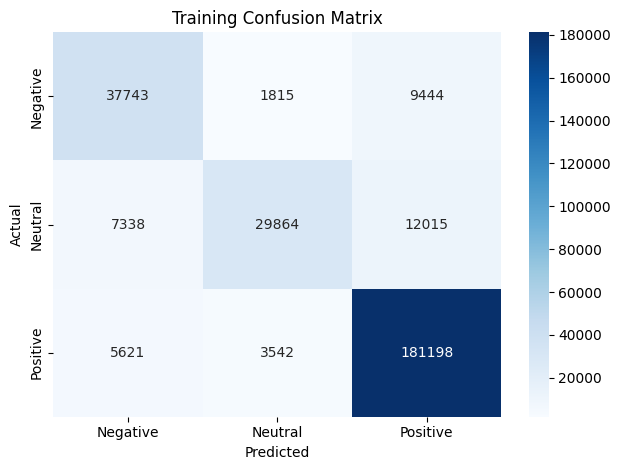

Training Accuracy: 0.8622
F1 Score (Positive): 0.9221
F1 Score (Negative): 0.7571


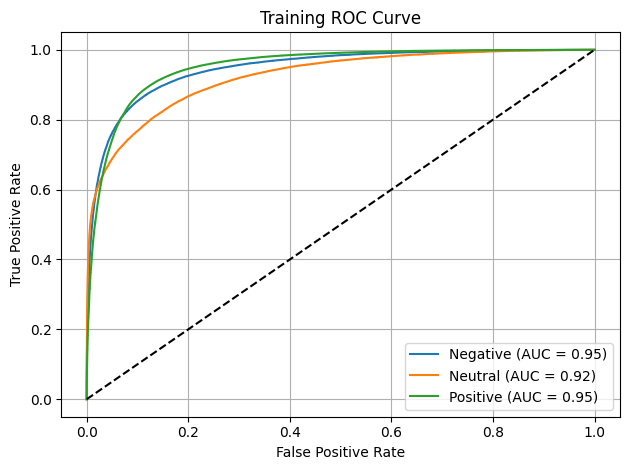

Training Weighted AUC: 0.9456


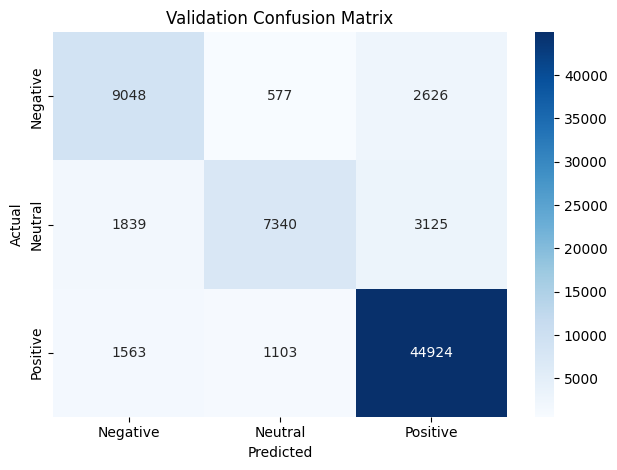

Validation Accuracy: 0.8498
F1 Score (Positive): 0.9143
F1 Score (Negative): 0.7326


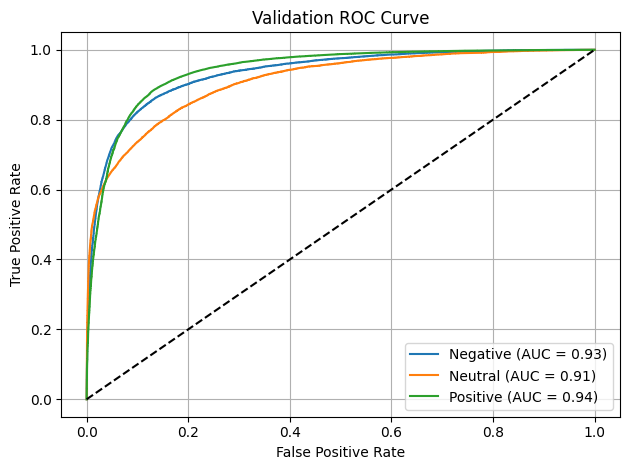

Validation Weighted AUC: 0.9353


In [124]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

def get_predictions(model, loader):
    model.eval()
    all_preds, all_probs, all_labels = [], [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            probs = torch.softmax(logits, dim=1)
            preds = logits.argmax(dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
            all_labels.extend(yb.cpu().numpy())

    return np.array(all_preds), np.array(all_probs), np.array(all_labels)

def evaluate_and_plot(name, preds, probs, true_labels, label_enc):
    # Confusion Matrix
    cm = confusion_matrix(true_labels, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Accuracy and F1 Scores
    acc = accuracy_score(true_labels, preds)
    f1_pos = f1_score(true_labels, preds, average=None)[label_enc.transform(['Positive'])[0]]
    f1_neg = f1_score(true_labels, preds, average=None)[label_enc.transform(['Negative'])[0]]
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"F1 Score (Positive): {f1_pos:.4f}")
    print(f"F1 Score (Negative): {f1_neg:.4f}")

    # ROC & AUC
    y_bin = label_binarize(true_labels, classes=[0, 1, 2])
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(3):  # for 3 classes
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], probs[:, i])
        roc_auc[i] = roc_auc_score(y_bin[:, i], probs[:, i])
        plt.plot(fpr[i], tpr[i], label=f"{label_enc.inverse_transform([i])[0]} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    weighted_auc = roc_auc_score(y_bin, probs, average="weighted", multi_class="ovr")
    print(f"{name} Weighted AUC: {weighted_auc:.4f}")

# --- Evaluate on Training ---
train_preds, train_probs, train_true = get_predictions(model, train_loader)
evaluate_and_plot("Training", train_preds, train_probs, train_true, label_enc)

# --- Evaluate on Validation ---
val_preds, val_probs, val_true = get_predictions(model, val_loader)
evaluate_and_plot("Validation", val_preds, val_probs, val_true, label_enc)


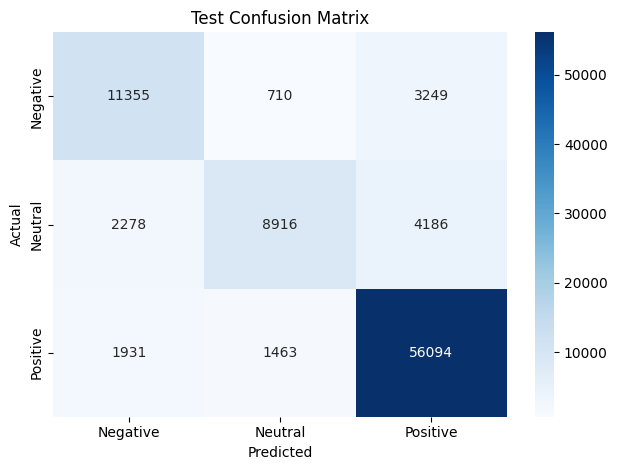

Test Accuracy: 0.8468
F1 Score (Positive): 0.9120
F1 Score (Negative): 0.7355


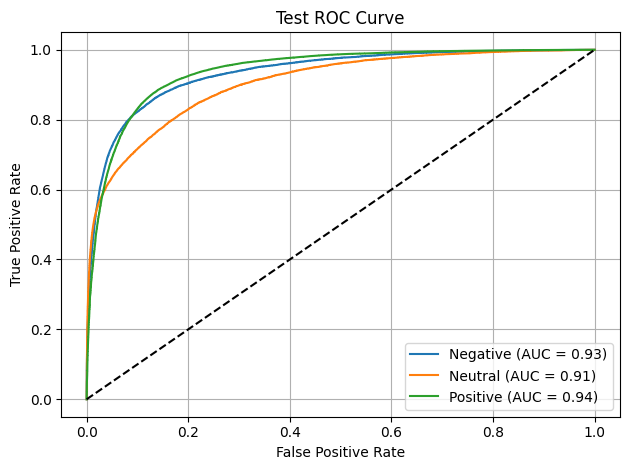

Test Weighted AUC: 0.9330


In [125]:
# --- Evaluate on Test ---
test_preds, test_probs, test_true = get_predictions(model, test_loader)
evaluate_and_plot("Test", test_preds, test_probs, test_true, label_enc)

In [126]:
import json

def save_metrics(name, preds, probs, true_labels, label_enc):
    acc = accuracy_score(true_labels, preds)
    f1s = f1_score(true_labels, preds, average=None)
    weighted_auc = roc_auc_score(label_binarize(true_labels, classes=[0, 1, 2]),
                                 probs, average="weighted", multi_class="ovr")

    metrics_dict = {
        "accuracy": acc,
        "f1_score": {
            label_enc.inverse_transform([i])[0]: float(f1)
            for i, f1 in enumerate(f1s)
        },
        "weighted_auc": weighted_auc
    }

    with open(f"{name.lower()}_metrics.json", "w") as f:
        json.dump(metrics_dict, f, indent=2)

    print(f"Saved {name} metrics to {name.lower()}_metrics.json")
# Save metrics for each dataset
save_metrics("Training", train_preds, train_probs, train_true, label_enc)
save_metrics("Validation", val_preds, val_probs, val_true, label_enc)
save_metrics("Test", test_preds, test_probs, test_true, label_enc)

Saved Training metrics to training_metrics.json
Saved Validation metrics to validation_metrics.json
Saved Test metrics to test_metrics.json


In [137]:
from lime.lime_text import LimeTextExplainer
import torch.nn.functional as F

# Convert text input → prediction probabilities
class_names = list(label_enc.classes_)

def predict_proba(texts):
    model.eval()
    encoded = [encode_sentence(text) for text in texts]
    input_tensor = torch.tensor(encoded).to(device)
    with torch.no_grad():
        logits = model(input_tensor)
        probs = F.softmax(logits, dim=1).cpu().numpy()
    return probs

# Setup LIME
explainer = LimeTextExplainer(class_names=class_names)

# Choose an example
i = 25  # Index in test set
text = X_test.iloc[i]

# Run LIME
exp = explainer.explain_instance(text, predict_proba, num_features=10, labels=[0, 1, 2])
#exp.show_in_notebook(text=True)
exp.save_to_file('lime_example.html')

Had some issue with IPython.py and display.py

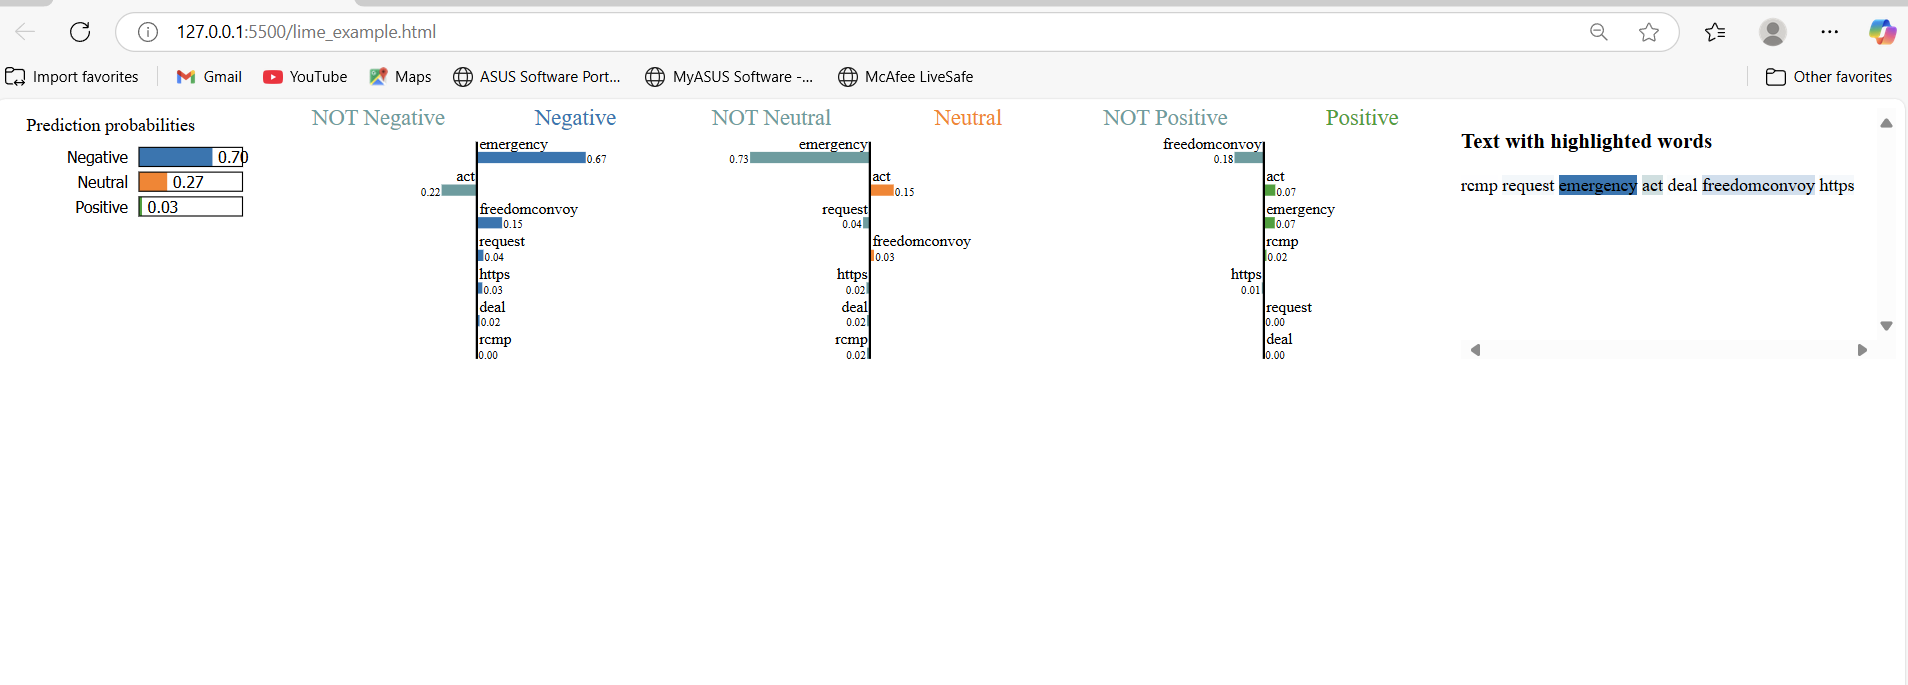

In [135]:
from PIL import Image
from IPython.display import display

img = Image.open('C:/Users/moksh/OneDrive/Documents/OneDrive/Desktop/LCIT/NLP_models/lime_example.png')
display(img)

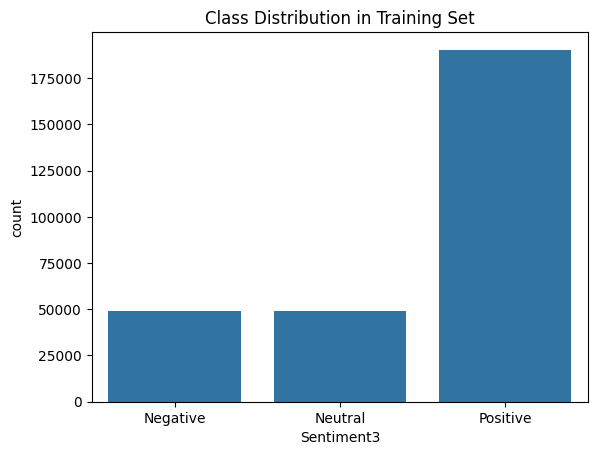

In [136]:
import seaborn as sns

sns.countplot(x=y_train, order=label_enc.classes_)
plt.title("Class Distribution in Training Set")
plt.show()

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Compute weights based on training distribution
weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = torch.tensor(weights, dtype=torch.float).to(device)

# Use in loss function
loss_fn = nn.CrossEntropyLoss(weight=class_weights)
